In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
tfd.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
builder = tfd.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [ ]:
train_data = tfd.load('rock_paper_scissors',split='train')
test_data = tfd.load('rock_paper_scissors',split='test')

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteKVBNLH/rock_paper_scissors-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteKVBNLH/rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
train_images = np.array([example['image'].numpy() for example in train_data])

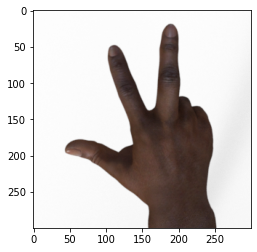

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_images.shape # we dont need to have the color hence the last dimension is not needed

(2520, 300, 300, 3)

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in train_data]) #just taking 1 color channel

In [ ]:
train_images.shape

(2520, 300, 300)

In [ ]:
train_labels = np.array([example['label'].numpy() for example in train_data])

In [ ]:
test_images = np.array([example['image'].numpy()[:,:,0] for example in test_data])
test_labels = np.array([example['label'].numpy() for example in test_data])

In [ ]:
import pandas as pd
pd.DataFrame(train_labels).value_counts()

2    840
1    840
0    840
dtype: int64

In [ ]:
test_images.shape

(372, 300, 300)

In [ ]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

In [ ]:
train_images = train_images.astype(float)
test_images = test_images.astype(float)

In [ ]:
train_images /= 255.0
test_images /= 255.0

In [ ]:
train_images.shape

(2520, 300, 300, 1)

In [ ]:
test_images.shape

(372, 300, 300, 1)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=[300,300,1]))

In [ ]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

In [ ]:
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))

In [ ]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(64,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 17s 183ms/step - loss: 1.1572 - accuracy: 0.5729
Epoch 2/5
79/79 [==============================] - 13s 163ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 3/5
79/79 [==============================] - 13s 163ms/step - loss: 0.0080 - accuracy: 0.9981
Epoch 4/5
79/79 [==============================] - 13s 163ms/step - loss: 0.0041 - accuracy: 0.9982
Epoch 5/5
79/79 [==============================] - 13s 163ms/step - loss: 3.7194e-04 - accuracy: 1.0000


In [ ]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 2s 148ms/step - loss: 1.3556 - accuracy: 0.7097


[1.3556352853775024, 0.7096773982048035]

Keras tuner

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 5.5MB/s 


In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
def model_builder(hp):
  model1 = tf.keras.Sequential()
  model1.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=[300,300,1]))
  model1.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model1.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
  model1.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model1.add(tf.keras.layers.Flatten())
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model1.add(tf.keras.layers.Dense(units=hp_units,activation='relu'))
  model1.add(tf.keras.layers.Dense(3,activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model1.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

  return model1

tuner = RandomSearch(model_builder,
                     objective='val_accuracy',
                     max_trials=5)

tuner.search(train_images,train_labels,validation_data=(test_images,test_labels),epochs=10,batch_size=32)

Trial 5 Complete [00h 02m 30s]
val_accuracy: 0.8064516186714172

Best val_accuracy So Far: 0.8064516186714172
Total elapsed time: 00h 12m 50s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 77ms/step - loss: 0.6277 - accuracy: 0.8346


[0.6417438387870789, 0.8064516186714172]